<a href="https://colab.research.google.com/github/Singh-Anshuman1/Anshu.github.io/blob/main/Next_word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving blue_castle.txt to blue_castle.txt


Load and Pre-Process the data

In [3]:
file = open("blue_castle.txt", "r", encoding = "utf8" )

#store file in list
lines = []
for i in file:
     lines.append(i)

#Convert list to string
data = ""
for i in lines:
    data = '  '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]


'The Project Gutenberg eBook of The Blue Castle, by Lucy Maud Montgomery This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usi'

In [4]:
len(data)

402906

Apply tokenization and some other changes

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl','wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 112, 97, 587, 4, 1, 94, 147, 58, 2383, 2384, 1818, 51, 587, 42]

In [ ]:
len(sequence_data)

72052

In [6]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8413


In [7]:
sequences = []

for i in range (3, len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)

print("The Length if sequences are:" , len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length if sequences are: 72049


array([[   1,  112,   97,  587],
       [ 112,   97,  587,    4],
       [  97,  587,    4,    1],
       [ 587,    4,    1,   94],
       [   4,    1,   94,  147],
       [   1,   94,  147,   58],
       [  94,  147,   58, 2383],
       [ 147,   58, 2383, 2384],
       [  58, 2383, 2384, 1818],
       [2383, 2384, 1818,   51]])

In [8]:
X = []
y = []

for i in sequences:
  X.append(i[0:3])
  y.append(i[3])

X = np.array(X)
y = np.array(y)

In [9]:
print("Data:", X[:10])
print("Response:", y[:10])

Data: [[   1  112   97]
 [ 112   97  587]
 [  97  587    4]
 [ 587    4    1]
 [   4    1   94]
 [   1   94  147]
 [  94  147   58]
 [ 147   58 2383]
 [  58 2383 2384]
 [2383 2384 1818]]
Response: [ 587    4    1   94  147   58 2383 2384 1818   51]


In [10]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Creating the model

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation= "relu"))
model.add(Dense(vocab_size, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             84130     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8413)              8421413   
                                                                 
Total params: 21,554,543
Trainable params: 21,554,543
Non-trainable params: 0
_________________________________________________________________


Plot the model

Train the model

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_word.keras", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint])

Epoch 1/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.0282
Epoch 1: loss improved from inf to 6.76165, saving model to next_word.keras
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - loss: 7.0279
Epoch 2/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.2584
Epoch 2: loss improved from 6.76165 to 6.21723, saving model to next_word.keras
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - loss: 6.2584
Epoch 3/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8787
Epoch 3: loss improved from 6.21723 to 5.84519, saving model to next_word.keras
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 5.8787
Epoch 4/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.5634
Epoch 4: loss improved from 5.84519 to 5.55342, saving model to next_word.keras
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 5.5634
Epoch 5/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2918
Epoch 5: loss improved from 5.55342 to 5.29540, saving model to next_word.keras
1126/1126 ━━━━

Lets Predict

In [17]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#Load the model and tokenizer
model = load_model('next_word.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predict_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word

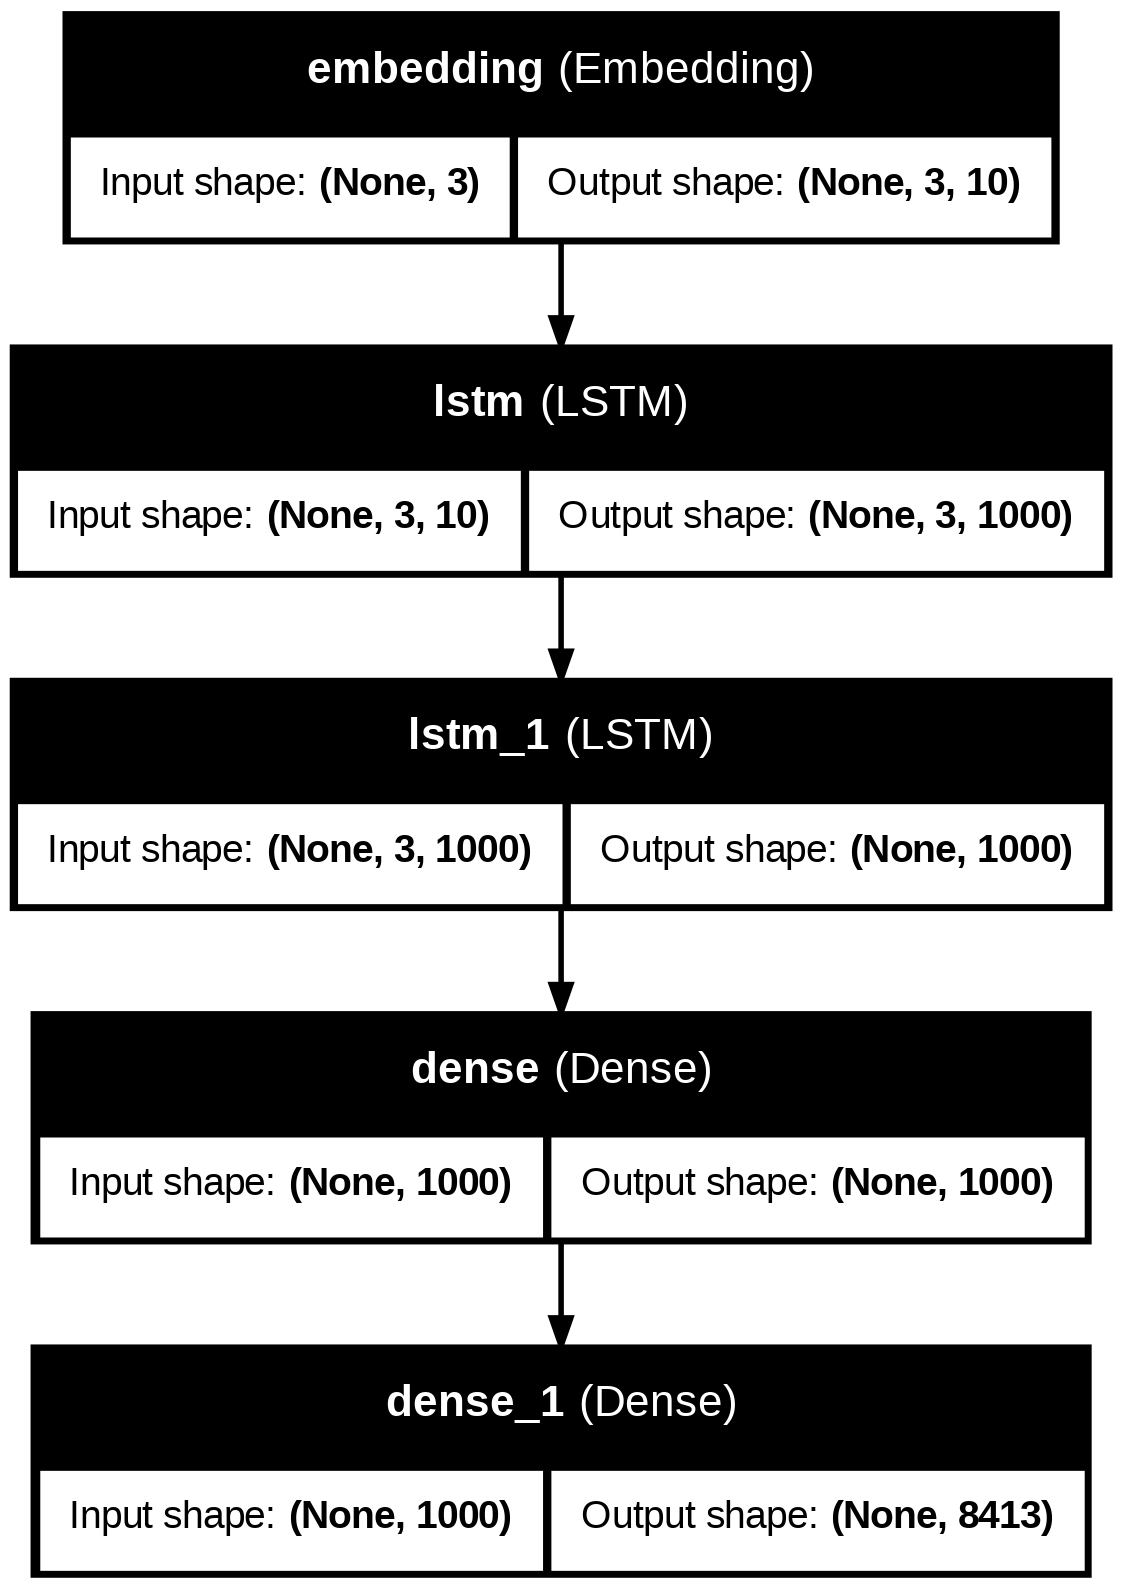

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='plot.png', show_shapes=True, show_layer_names=True)


In [18]:
while(True):
  text = input("Enter your line:")

  if text == "0":
    print("Execution completed....")
    break

  else:
    try:
      text = text.split(" ")
      text = text[-3:]
      print(text)

      Predict_Next_Words(model, tokenizer, text)


    except Exception as e:
       print("Error occured: ",e)
       continue

Enter your line:i am a 
['am', 'a', '']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
little
Enter your line:who are you
['who', 'are', 'you']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
going
Enter your line:he is very
['he', 'is', 'very']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
lonely


KeyboardInterrupt: Interrupted by user